In [47]:
from importlib import reload
from scipy.stats import boxcox
from dfprepare import norm_data

import LRR
reload(LRR)
from LRR import *

,carbon_monoxide,tar,nicotine,weight
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4
5,15.0,1.04,0.8885,15.0
6,8.8,0.76,1.0267,9.0
7,12.4,0.95,0.9225,12.3
8,16.6,1.12,0.9372,16.3
9,14.9,1.02,0.8858,15.4


,carbon_monoxide,tar,nicotine,weight
0,0.454861,0.384211,0.526981,0.550000
1,0.520833,0.489474,0.812582,0.686364
2,1.000000,1.000000,1.000000,1.000000
3,0.243056,0.284211,0.376152,0.395455
4,0.107639,0.142105,0.424059,0.177273
5,0.486111,0.478947,0.272177,0.613636
6,0.270833,0.331579,0.635957,0.340909
7,0.395833,0.431579,0.361674,0.490909
8,0.541667,0.521053,0.400369,0.672727
9,0.482639,0.468421,0.265070,0.631818


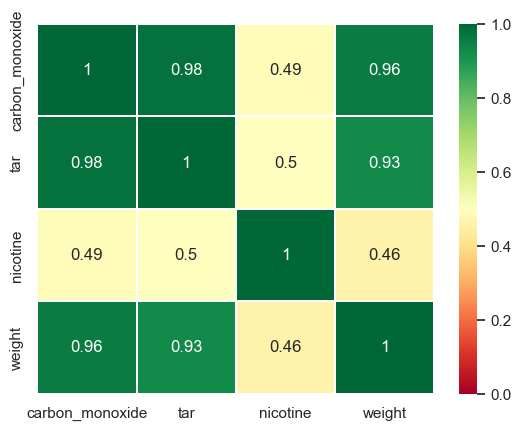

In [48]:
# Read dataframe
data = pd.read_csv('cigarettes.txt', names=['Brand', 'carbon_monoxide', 'tar', 'nicotine', 'weight'])
data = data.drop('Brand', axis=1)
data.dropna(inplace=True)
display(data)

# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Dependent variable
explore_column = 'carbon_monoxide' 

### Строим базовую модель

                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           9.95e-17
Time:                        02:21:18   Log-Likelihood:                 51.120
No. Observations:                  25   AIC:                            -94.24
Df Residuals:                      21   BIC:                            -89.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0436      0.020     -2.230      0.0

,df,sum_sq,mean_sq,F,PR(>F)
tar,1.0,0.885912,0.885912,758.982122,5.721126e-18
nicotine,1.0,0.000006,0.000006,0.005532,9.414127e-01
weight,1.0,0.018430,0.018430,15.789224,6.920652e-04
Residual,21.0,0.024512,0.001167,NaN,NaN


,dfb_Intercept,dfb_tar,dfb_nicotine,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.010305,-0.257601,0.080907,0.258683,0.045853,1.647378,0.063306,0.428268,1.722848,0.447888
1,-0.022931,-0.023380,0.031074,0.023474,0.000576,0.107551,0.166207,0.048019,0.104988,0.046874
2,-1.113964,1.748143,0.437587,-1.186843,1.411701,1.759391,0.645920,2.376301,1.859498,2.511509
3,-0.200628,0.068926,0.053222,-0.031238,0.019624,-1.140943,0.056872,-0.280173,-1.149649,-0.282311
4,-0.043373,-0.000752,-0.014367,0.021287,0.000876,-0.144423,0.143771,-0.059180,-0.141012,-0.057783
5,0.005303,0.002482,-0.014528,0.002718,0.000093,0.050699,0.126748,0.019315,0.049480,0.018851
6,-0.096164,-0.118868,-0.151164,0.188609,0.022024,-0.743327,0.137515,-0.296810,-0.735148,-0.293544
7,-0.073103,-0.080587,0.074278,0.063113,0.005045,-0.475323,0.081996,-0.142057,-0.466383,-0.139385
8,0.002180,0.002799,-0.047204,0.023911,0.001932,0.269659,0.096071,0.087911,0.263617,0.085941
9,-0.002834,0.000823,0.009393,-0.004274,0.000042,-0.032474,0.138078,-0.012997,-0.031692,-0.012685


,student_resid,unadj_p,bonferroni(p)
0,1.722848,0.100344,1.0
1,0.104988,0.917431,1.0
2,1.859498,0.077732,1.0
3,-1.149649,0.263851,1.0
4,-0.141012,0.889271,1.0
5,0.049480,0.961028,1.0
6,-0.735148,0.470783,1.0
7,-0.466383,0.645981,1.0
8,0.263617,0.794772,1.0
9,-0.031692,0.975032,1.0


Breusch-Pagan test: 
LM statistic: 0.5788882004917201      LM-Test p-value: 0.9012479670908548 
F-statistic: 0.16593091406770558       F-Test p-value: 0.9181331358764258


,Variable,VIF,Tolerance
0,tar,40.564418,0.024652
1,nicotine,6.107280,0.163739
2,weight,40.765142,0.024531


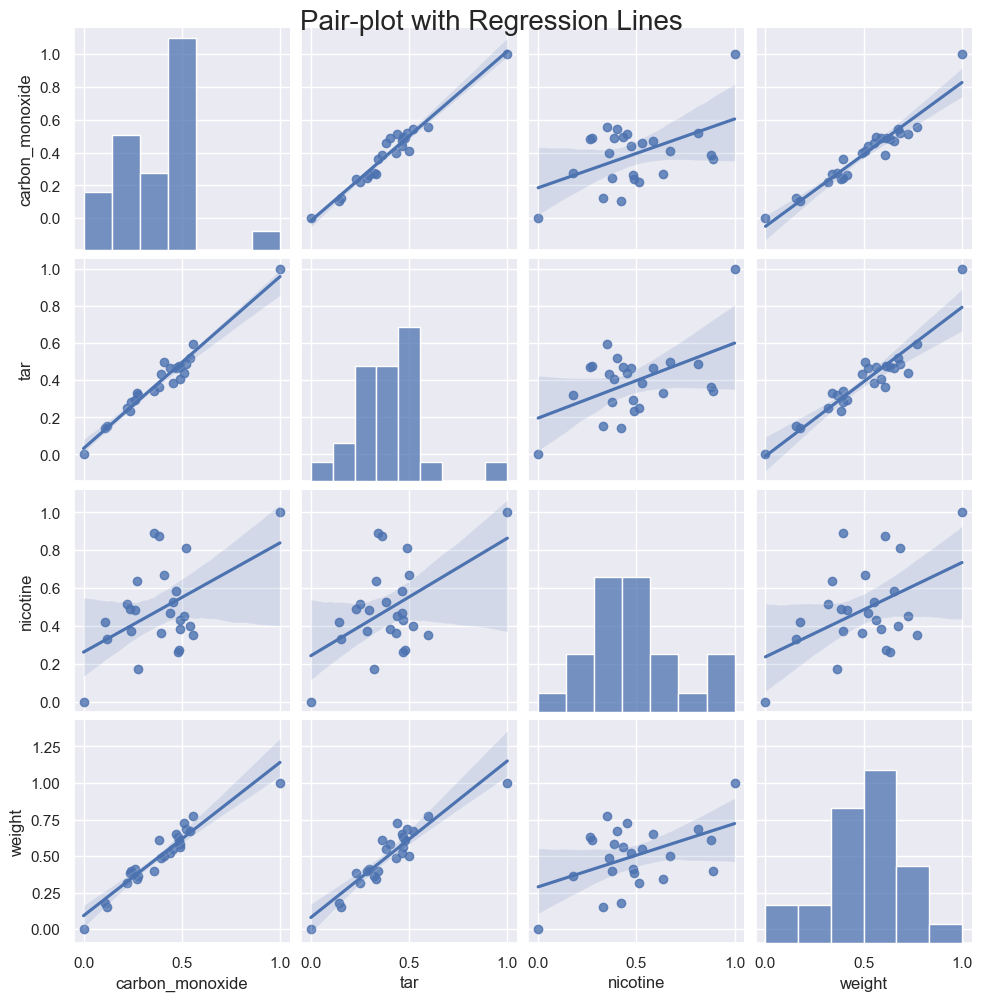

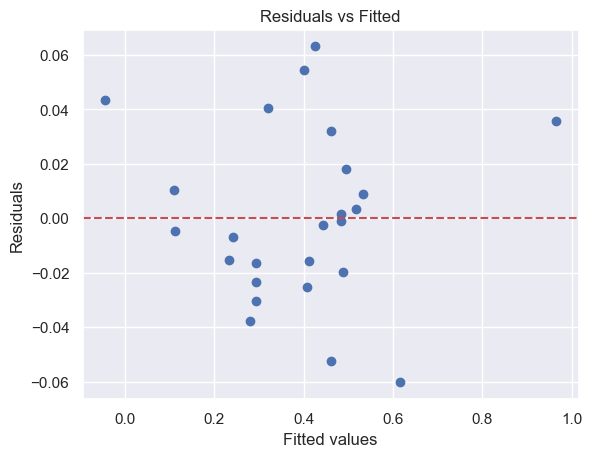

D:\PythonEnv\Matt\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


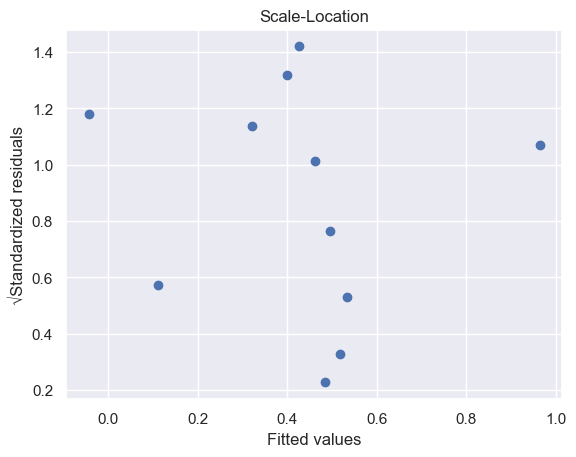

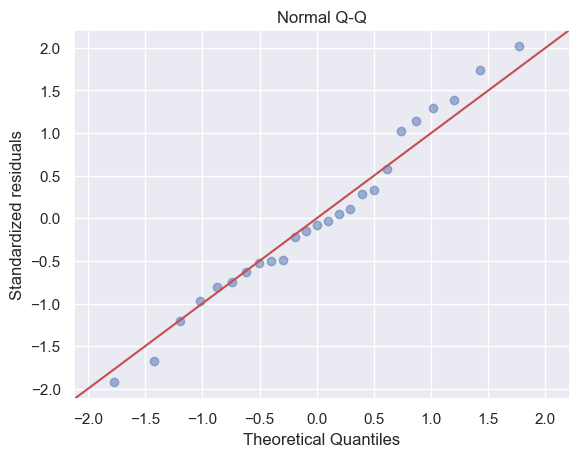

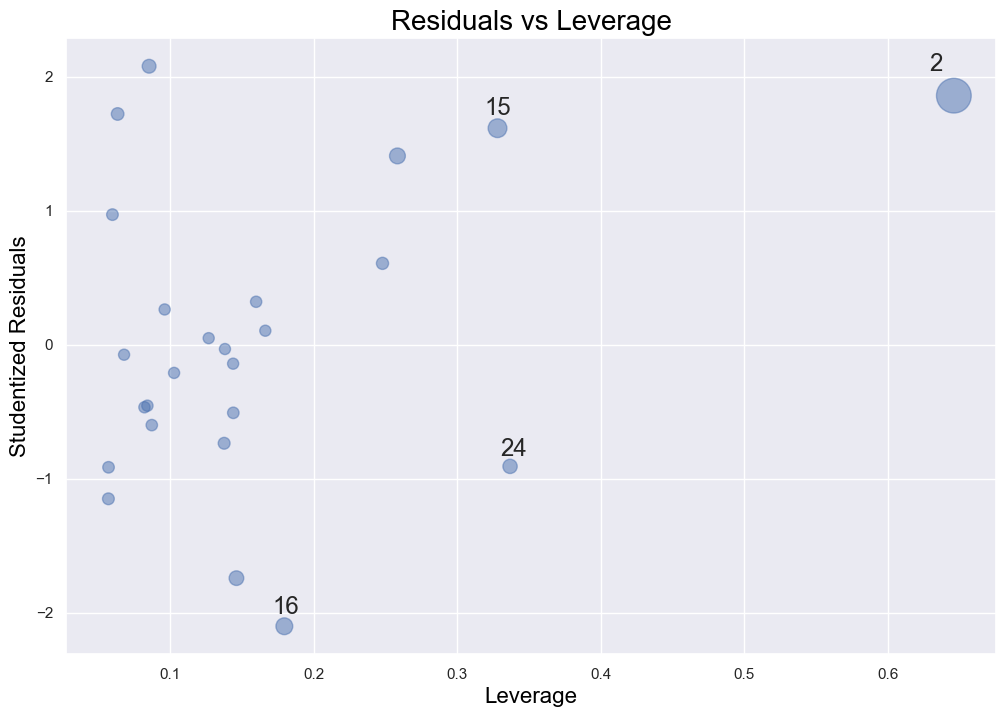

                                STEPS AIC                              
Selected Features: ['tar', 'nicotine', 'weight'] 
AIC: -94.23981158876805 
Selected Features: ['tar', 'weight'] 
AIC: -96.23486563233041 


In [49]:
base_research = LinearRegressionResearch(data, column=explore_column)
base_research.info()
base_research.run_tests()
base_research.draw_plots()
new_model, selected_features = base_research.stepwise_selection(criteria='AIC')

### Проведём исследование улучшенной модели

                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     405.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           4.33e-18
Time:                        02:21:22   Log-Likelihood:                 51.117
No. Observations:                  25   AIC:                            -96.23
Df Residuals:                      22   BIC:                            -92.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0431      0.017     -2.501      0.0

,df,sum_sq,mean_sq,F,PR(>F)
tar,1.0,0.885912,0.885912,794.966837,9.196536e-19
weight,1.0,0.018431,0.018431,16.539262,5.124136e-04
Residual,22.0,0.024517,0.001114,NaN,NaN


,dfb_Intercept,dfb_tar,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.051643,-0.252054,0.265180,0.061901,1.687217,0.061240,0.430934,1.766683,0.451230
1,-0.011627,-0.019092,0.026125,0.000529,0.124268,0.093162,0.039830,0.121453,0.038928
2,-1.001219,1.837932,-1.157471,1.746029,1.767850,0.626312,2.288687,1.864726,2.414104
3,-0.202017,0.084065,-0.031889,0.026457,-1.169479,0.054850,-0.281729,-1.179853,-0.284228
4,-0.053299,-0.003746,0.020569,0.001024,-0.140358,0.134883,-0.055422,-0.137193,-0.054172
5,-0.000658,-0.000353,0.001585,0.000018,0.031199,0.051461,0.007267,0.030483,0.007100
6,-0.173200,-0.148761,0.181555,0.020069,-0.731867,0.101048,-0.245373,-0.723907,-0.242705
7,-0.046309,-0.067801,0.064623,0.005008,-0.490781,0.058711,-0.122570,-0.482144,-0.120413
8,-0.019308,-0.006960,0.022606,0.001621,0.260029,0.067088,0.069730,0.254442,0.068232
9,0.002064,0.004292,-0.006360,0.000057,-0.050611,0.062362,-0.013052,-0.049450,-0.012753


,student_resid,unadj_p,bonferroni(p)
0,1.766683,0.091814,1.0
1,0.121453,0.904487,1.0
2,1.864726,0.076257,1.0
3,-1.179853,0.251252,1.0
4,-0.137193,0.892185,1.0
5,0.030483,0.975970,1.0
6,-0.723907,0.477110,1.0
7,-0.482144,0.634691,1.0
8,0.254442,0.801629,1.0
9,-0.049450,0.961028,1.0


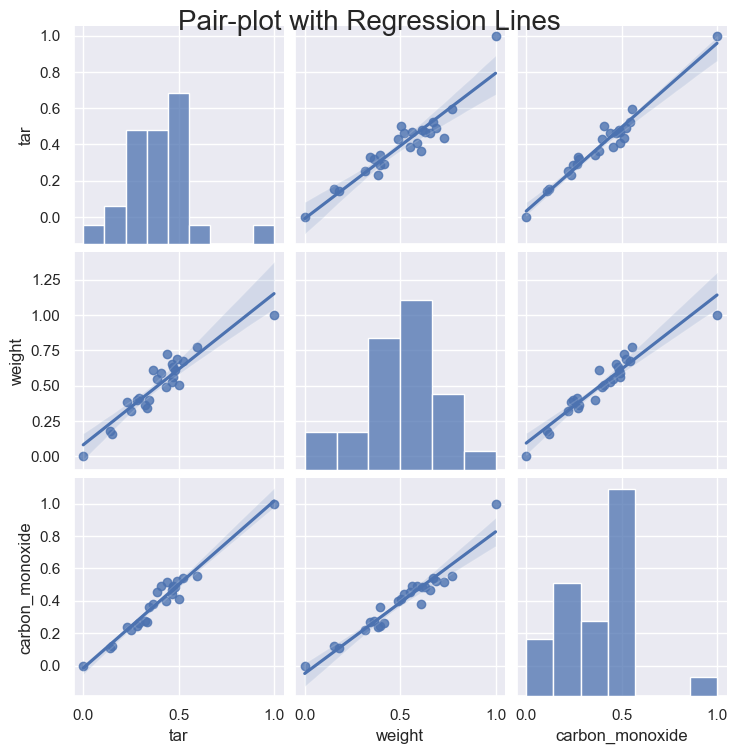

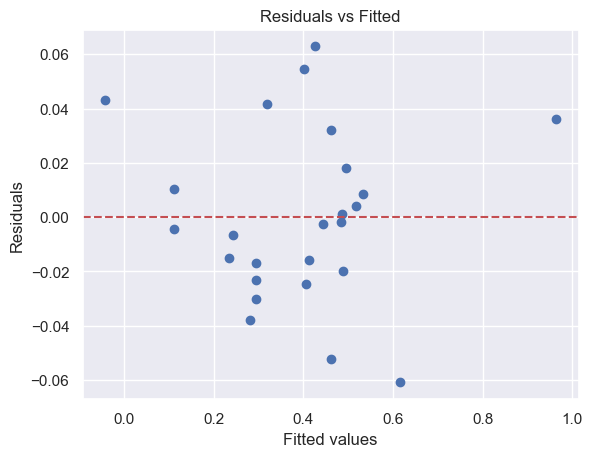

D:\PythonEnv\Matt\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


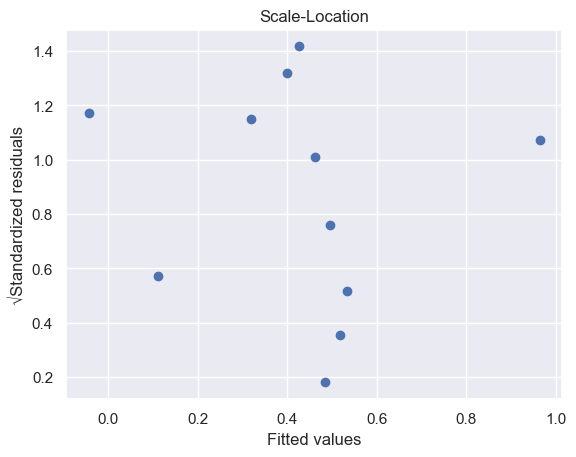

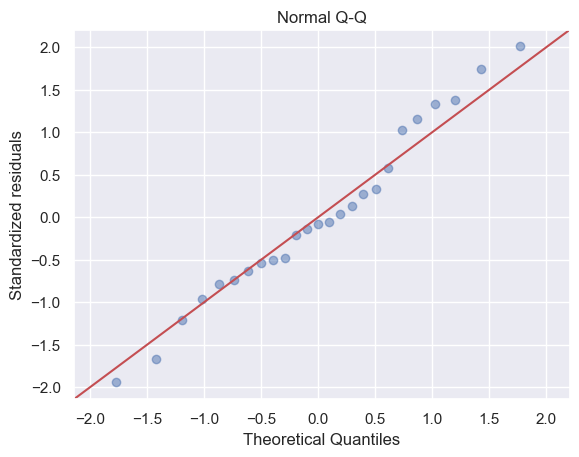

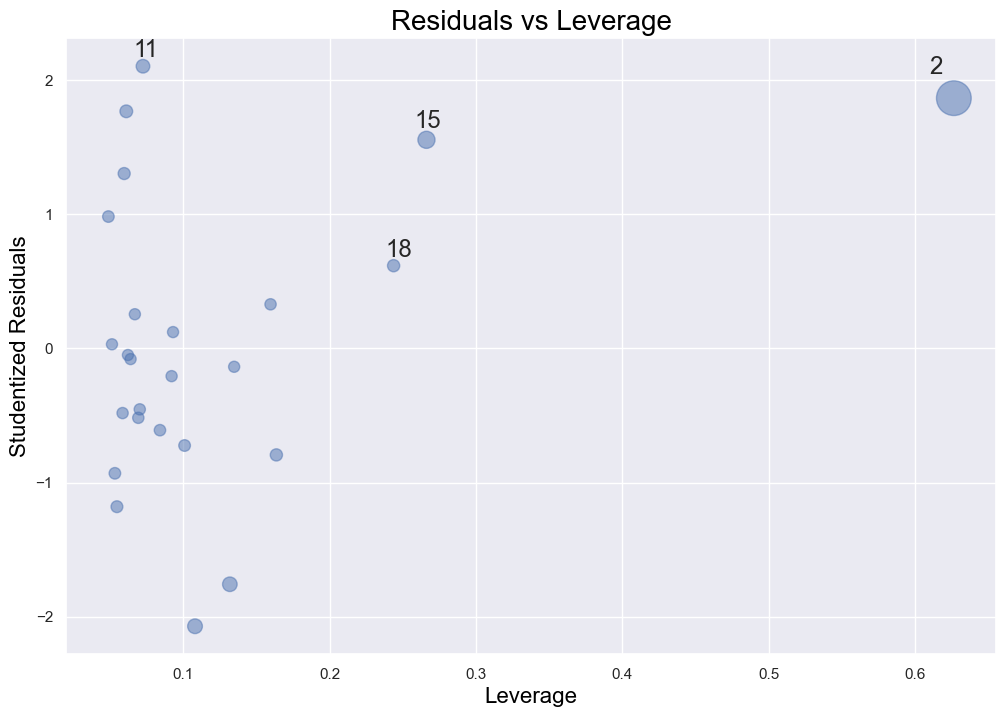

Breusch-Pagan test: 
LM statistic: 0.5408042285094228      LM-Test p-value: 0.7630725902698116 
F-statistic: 0.24321513140417997       F-Test p-value: 0.7861832908123859


,Variable,VIF,Tolerance
0,tar,39.377802,0.025395
1,weight,39.377802,0.025395


In [50]:
new_data = data[selected_features + [explore_column]]
enhanced_research = LinearRegressionResearch(new_data, column=explore_column)
enhanced_research.info()
enhanced_research.draw_plots()
enhanced_research.run_tests()

### Попытаемся улучшить уже улучшенную модель при помощи (Box-Cox)

                              carbon_monoxide_t                               
Dep. Variable:      carbon_monoxide_t   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     418.6
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           3.10e-18
Time:                        02:21:25   Log-Likelihood:                 60.642
No. Observations:                  25   AIC:                            -115.3
Df Residuals:                      22   BIC:                            -111.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0094      0.012      0.795      0.4

,df,sum_sq,mean_sq,F,PR(>F)
tar,1.0,0.416029,0.416029,799.810150,8.616960e-19
weight,1.0,0.019499,0.019499,37.486811,3.664417e-06
Residual,22.0,0.011444,0.000520,NaN,NaN


,dfb_Intercept,dfb_tar,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.056836,-0.277397,0.291844,0.072981,1.832000,0.061240,0.467913,1.944322,0.496601
1,-0.003922,-0.006440,0.008813,0.000060,0.041933,0.093162,0.013440,0.040970,0.013132
2,0.583404,-1.070952,0.674451,0.654215,-1.082131,0.626312,-1.400944,-1.086564,-1.406683
3,-0.204558,0.085122,-0.032290,0.027084,-1.183257,0.054850,-0.285048,-1.194693,-0.287803
4,-0.303310,-0.021319,0.117052,0.032251,-0.787750,0.134883,-0.311050,-0.780728,-0.308277
5,-0.007093,-0.003805,0.017091,0.002036,0.335526,0.051461,0.078152,0.328654,0.076551
6,-0.011791,-0.010128,0.012360,0.000095,-0.050440,0.101048,-0.016911,-0.049283,-0.016523
7,0.021689,0.031755,-0.030266,0.001108,0.230848,0.058711,0.057653,0.225814,0.056396
8,-0.028410,-0.010240,0.033262,0.003497,0.381927,0.067088,0.102419,0.374389,0.100398
9,-0.004246,-0.008830,0.013084,0.000240,0.104107,0.062362,0.026849,0.101739,0.026238


,student_resid,unadj_p,bonferroni(p)
0,1.944322,0.065374,1.0
1,0.040970,0.967707,1.0
2,-1.086564,0.289545,1.0
3,-1.194693,0.245526,1.0
4,-0.780728,0.443675,1.0
5,0.328654,0.745672,1.0
6,-0.049283,0.961159,1.0
7,0.225814,0.823529,1.0
8,0.374389,0.711868,1.0
9,0.101739,0.919929,1.0


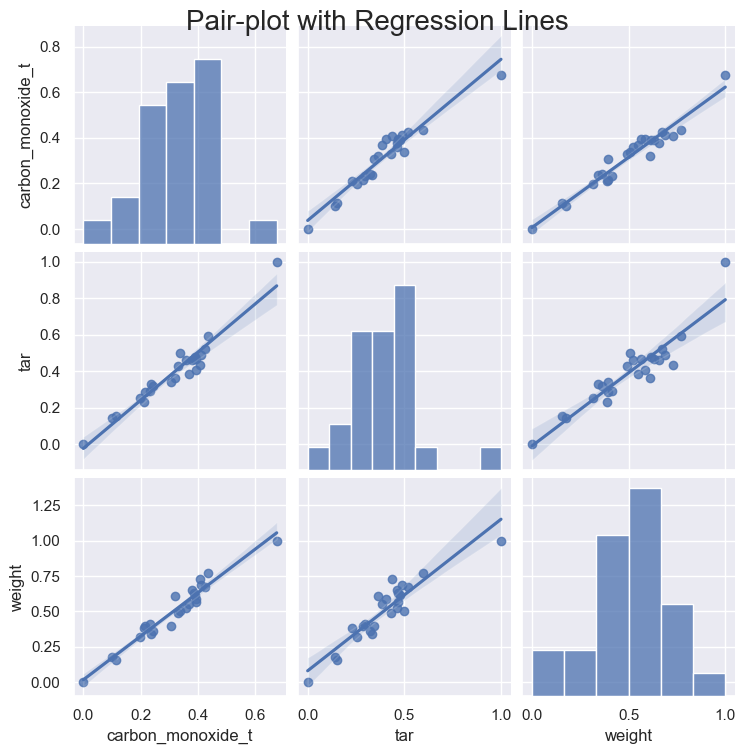

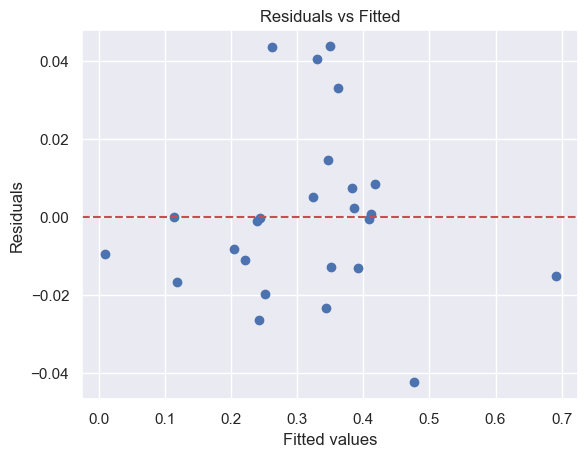

D:\PythonEnv\Matt\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


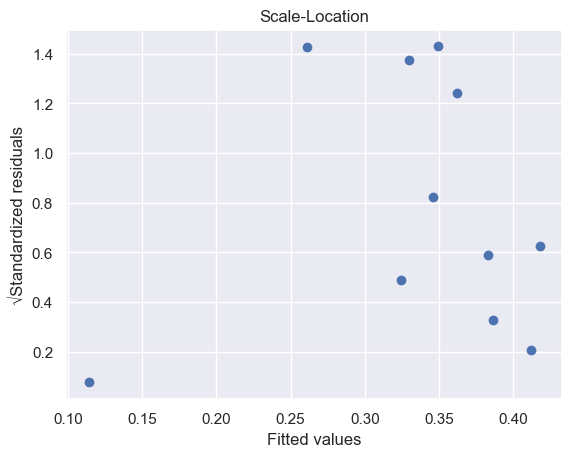

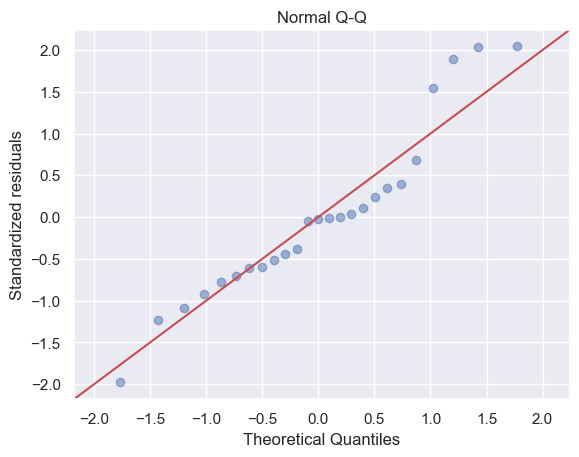

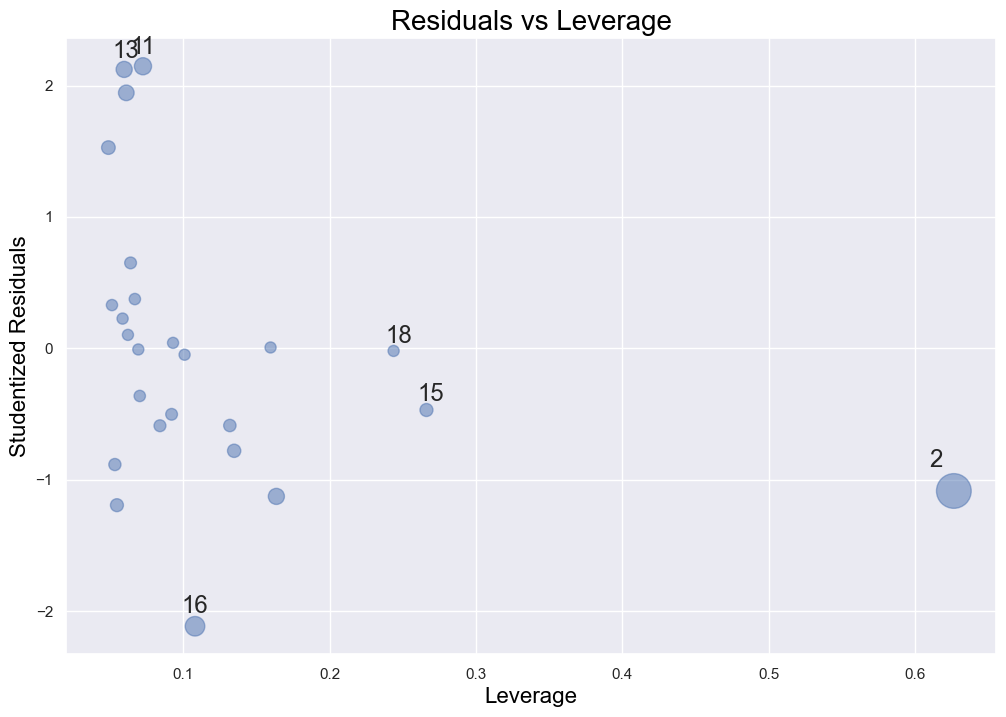

Breusch-Pagan test: 
LM statistic: 1.1140636258642145      LM-Test p-value: 0.5729070379109056 
F-statistic: 0.5130508468479396       F-Test p-value: 0.6056544143593023


,Variable,VIF,Tolerance
0,tar,39.377802,0.025395
1,weight,39.377802,0.025395


In [51]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1)  # + 1 чтобы не было 0-значений

new_data = pd.DataFrame()
new_explore_column = explore_column + '_t'
new_data[new_explore_column] = y_transformed
new_data[selected_features] = data[selected_features]

# Проводим анализ заново
enhanced_research = LinearRegressionResearch(new_data, column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()
enhanced_research.run_tests()